# Удой коров
Нам передали данные о коровах.

***Описание данных:*** 3 CSV-файла с данными о коровах. О качестве данных ничего неизвестно, так что понадобится провести их обзор и подготовку.

Описание датасетов и их столбцов:
ferma_main.csv содержит данные о стаде фермера на текущий момент:
- `id` — уникальный идентификатор коровы;
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах);
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы;
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах);
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы;
- `Порода` — порода коровы;
- `Тип пастбища` — ландшафт лугов, на которых паслась корова;
- `порода папы_быка` — порода папы коровы;
- `Жирность,%` — содержание жиров в молоке (в процентах);
- `Белок,%` — содержание белков в молоке (в процентах);
- `Вкус молока` —  оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно);
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

ferma_dad.csv хранит имя папы каждой коровы в стаде фермера:
- `id` — уникальный идентификатор коровы;
- `Имя Папы` — имя папы коровы.

cow_buy.csv — данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:
- `Порода` — порода коровы;
- `Тип пастбища` — ландшафт лугов, на которых паслась корова;
- `порода папы_быка` — порода папы коровы;
- `Имя_папы` — имя папы коровы;
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах);
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах);
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

***Цель исследования:*** Разработать модели машинного обучения, которые помогут заказчику управлять рисками и принимать объективное решение о покупке коров, спрогнозировав удой и вкус молока.

***Ход исследования:*** Планируется 7 этапов:
- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Корреляционный анализ
- Обучение модели линейной регрессии
- Обучение модели логистической регрессии
- Итоговые выводы

## Загрузка данных

In [1]:
# Импортируем необходимые библиотеки и методы.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    r2_score, mean_squared_error, 
    mean_absolute_error, accuracy_score, 
    recall_score, precision_score, 
    confusion_matrix
)

In [2]:
# Откроем и изучим ferma_main.csv.
ferma = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
ferma.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [3]:
ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [4]:
# Откроем и изучим ferma_dad.csv.
dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [5]:
dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
# Откроем и изучим cow_buy.csv.
buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')
buy.head(20)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [7]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Промежуточный вывод:** Видим данные о коровах фермера и ассоциации, их корме (в случае фермера), молоке, папах-быках. Данные соответствуют описанию задачи, но не соответствуют общему оформлению, заметны неявные дубликаты. Обзор данных методом info() не выявил пропуски.

##  Предобработка данных

In [8]:
# Приведем названия столбцов датафреймов к общему читаемому виду.
# Единицы измерения и расшифровки аббревиатур уберем.
ferma.columns = ['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
                'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст']
dad.columns = ['id', 'имя_папы']
buy.columns = ['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'текущая_жирность',
               'текущий_белок', 'возраст']

In [9]:
# Проверим ferma_main.csv на дубликаты.
ferma.duplicated().sum()

5

In [10]:
# Удалим дубликаты.
ferma = ferma.drop_duplicates().reset_index(drop=True)

In [11]:
# Проверим cow_buy.csv на дубликаты.
buy.duplicated().sum()

4

In [12]:
# Удалим дубликаты.
buy = buy.drop_duplicates().reset_index(drop=True)

In [13]:
# Проверим датафреймы на неявные дубликаты.
ferma['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [14]:
# Приведем данные к одному виду.
ferma['порода'] = ferma['порода'].replace('Вис Бик Айдиал', 'Айдиал')
ferma['порода'] = ferma['порода'].replace('РефлешнСоверинг', 'Соверин')

In [15]:
ferma['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [16]:
# Приведем данные к одному виду.
ferma['тип_пастбища'] = ferma['тип_пастбища'].replace(['Равнинное', 'Равнинные'], 'равнинное')
ferma['тип_пастбища'] = ferma['тип_пастбища'].replace('Холмистое', 'холмистое')

In [17]:
ferma['порода_папы'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [18]:
# Приведем данные к одному виду.
ferma['порода_папы'] = ferma['порода_папы'].replace('Айдиалл', 'Айдиал')

In [19]:
ferma['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [20]:
ferma['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [21]:
dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [22]:
buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [23]:
# Приведем данные к одному виду.
buy['порода'] = buy['порода'].replace('Вис Бик Айдиал', 'Айдиал')
buy['порода'] = buy['порода'].replace('РефлешнСоверинг', 'Соверин')

**Промежуточный вывод:** В ходе удаления дубликатов изначальные данные заметно не пострадали (было убрано 5 из 634 строк). Данные приведены к одному виду и нужным типам и готовы к работе.

## Исследовательский анализ данных

Проведем статистический анализ данных. Построим графики признаков.

### Удой коров фермера

In [24]:
ferma['удой'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, dtype: float64

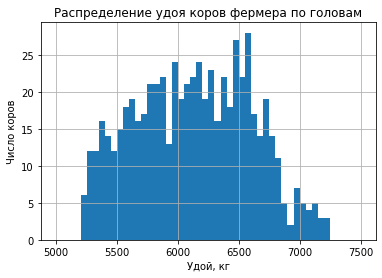

In [25]:
# Построим гистограмму удоя коров фермера.
ferma['удой'].hist(bins=50, range=(5000, 7500))
plt.title("Распределение удоя коров фермера по головам")
plt.xlabel("Удой, кг")
plt.ylabel("Число коров")
plt.show()

**Описание данных:** Видим распределение, похожее на нормальное, в диапазоне от ~ 5200 до 7250 кг, с небольшими выбросами около 6500 кг и около 6800 кг, что не особо вызывает подозрения. Присутствуют и выбросы за пределами 7500 кг, которые уже вряд ли реальны. Заменим их по медиане.

In [26]:
ferma.loc[ferma['удой'] > 7500, 'удой'] = ferma['удой'].median()

### Энергетическая кормовая единица корма коров фермера

In [27]:
ferma['эке'].describe()

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

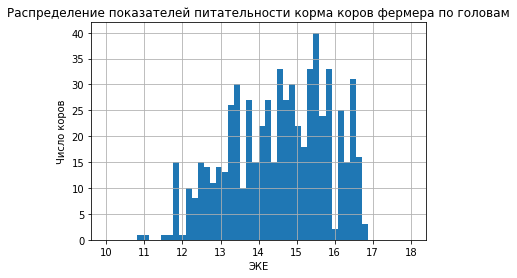

In [28]:
# Построим гистограмму показателей питательности корма коров фермера.
ferma['эке'].hist(bins=50, range=(10, 18))
plt.title("Распределение показателей питательности корма коров фермера по головам")
plt.xlabel("ЭКЕ")
plt.ylabel("Число коров")
plt.show()

**Описание данных:** Видим распределение, похожее на нормальное со сдвигом вправо, в диапазоне от 10.9 до 16.8. Есть выброс вниз, однако он не критичен.

### Содержание сырого протеина в корме коров фермера

In [29]:
ferma['протеин'].describe()

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: протеин, dtype: float64

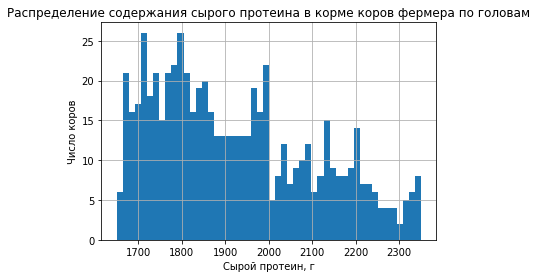

In [30]:
# Построим гистограмму содержания сырого протеина в корме коров фермера.
ferma['протеин'].hist(bins=50, range=(1650, 2350))
plt.title("Распределение содержания сырого протеина в корме коров фермера по головам")
plt.xlabel("Сырой протеин, г")
plt.ylabel("Число коров")
plt.show()

**Описание данных:** Видим почти равномерное распределение в диапазоне от 1660 до 2349, без критичных выбросов.

### Отношение сахара к протеину в корме коров фермера

In [31]:
ferma['спо'].describe()

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

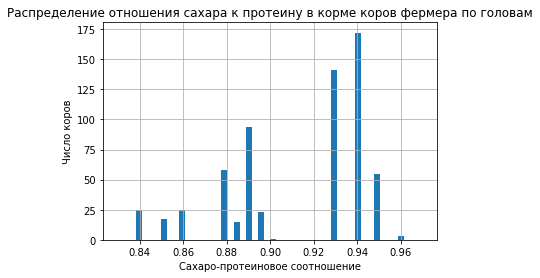

In [32]:
# Построим гистограмму отношения сахара к протеину в корме коров фермера.
ferma['спо'].hist(bins=50, range=(0.83, 0.97))
plt.title("Распределение отношения сахара к протеину в корме коров фермера по головам")
plt.xlabel("Сахаро-протеиновое соотношение")
plt.ylabel("Число коров")
plt.show()

**Описание данных:** Видим распределение, похожее на нормальное со сдвигом вправо, в диапазоне от 0.84 до 0.96, без критичных выбросов.

### Порода коров фермера

In [33]:
ferma['порода'].value_counts()

Айдиал     373
Соверин    256
Name: порода, dtype: int64

<AxesSubplot:title={'center':'Порода коров фермера'}, ylabel='порода'>

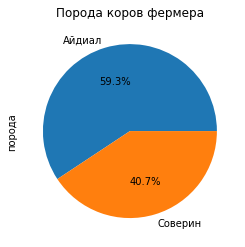

In [34]:
# Построим круговую диаграмму пород коров фермера.
ferma['порода'].value_counts().plot(kind='pie', title='Порода коров фермера', autopct='%1.1f%%')

**Описание данных:** Видим, что всего в выборке две породы, распределенные в отношении 59.3 к 40.7 с перевесом в пользу Вис Бик Айдиал.

### Тип пастбища коров фермера

In [35]:
ferma['тип_пастбища'].value_counts()

холмистое    351
равнинное    278
Name: тип_пастбища, dtype: int64

<AxesSubplot:title={'center':'Тип пастбища коров фермера'}, ylabel='тип_пастбища'>

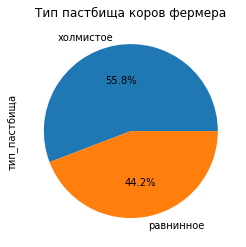

In [36]:
# Построим круговую диаграмму типов пастбищ коров фермера.
ferma['тип_пастбища'].value_counts().plot(kind='pie', title='Тип пастбища коров фермера', autopct='%1.1f%%')

**Описание данных:** Видим, что всего в выборке два типа пастбищ, распределенные в отношении 55.8 к 44.2 с перевесом в пользу холимистого типа.

### Порода пап коров фермера

In [37]:
ferma['порода_папы'].value_counts()

Айдиал     318
Соверин    311
Name: порода_папы, dtype: int64

<AxesSubplot:title={'center':'Порода пап коров фермера'}, ylabel='порода_папы'>

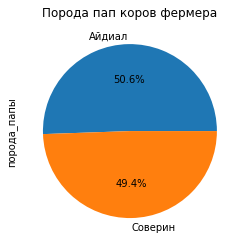

In [38]:
# Построим круговую диаграмму пород пап коров фермера.
ferma['порода_папы'].value_counts().plot(kind='pie', title='Порода пап коров фермера', autopct='%1.1f%%')

**Описание данных:** Видим, что всего в выборке две породы, распределенные в отношении 50.6 к 49.4 с перевесом в пользу Вис Бик Айдиал.

### Cодержание жиров в молоке коров фермера

In [39]:
ferma['жирность'].describe()

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

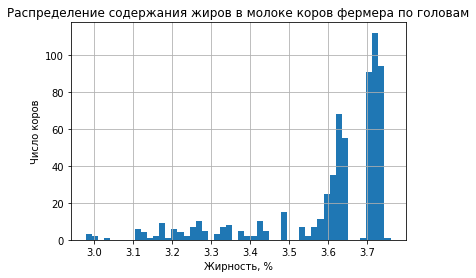

In [40]:
# Построим гистограмму содержания жиров в молоке коров фермера.
ferma['жирность'].hist(bins=50, range=(2.98, 3.76))
plt.title("Распределение содержания жиров в молоке коров фермера по головам")
plt.xlabel("Жирность, %")
plt.ylabel("Число коров")
plt.show()

**Описание данных:** Видим распределение, похожее на нормальное со сдвигом вправо, в диапазоне от 2.99 до 3.75, без критичных выбросов. Пробелы в показателях возможно объяснимы точностью измерительных приборов, разными породами или кормом.

### Cодержание белков в молоке коров фермера

In [41]:
ferma['белок'].describe()

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64

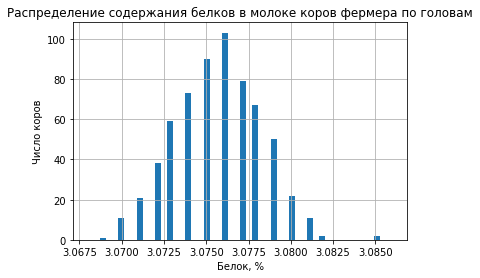

In [42]:
# Построим гистограмму содержания белков в молоке коров фермера.
ferma['белок'].hist(bins=50, range=(3.068, 3.086))
plt.title("Распределение содержания белков в молоке коров фермера по головам")
plt.xlabel("Белок, %")
plt.ylabel("Число коров")
plt.show()

**Описание данных:** Видим распределение, похожее на нормальное, в диапазоне от 3.069 до 3.085, без критичных выбросов.

### Вкус молока коров фермера

In [43]:
ferma['вкус_молока'].value_counts()

вкусно       371
не вкусно    258
Name: вкус_молока, dtype: int64

<AxesSubplot:title={'center':'Вкус молока коров фермера'}, ylabel='вкус_молока'>

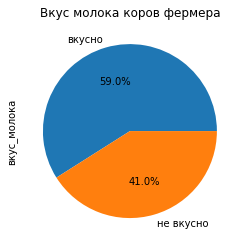

In [44]:
# Построим круговую диаграмму пород пап коров фермера.
ferma['вкус_молока'].value_counts().plot(kind='pie', title='Вкус молока коров фермера', autopct='%1.1f%%')

**Описание данных:** Видим, что выборка распределена в отношении 59 к 41 с перевесом в пользу вкусного молока.

### Возраст коров фермера

In [45]:
ferma['возраст'].value_counts()

более_2_лет    519
менее_2_лет    110
Name: возраст, dtype: int64

<AxesSubplot:title={'center':'Возраст коров фермера'}, ylabel='возраст'>

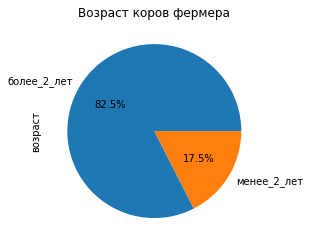

In [46]:
# Построим круговую диаграмму возраста коров фермера.
ferma['возраст'].value_counts().plot(kind='pie', title='Возраст коров фермера', autopct='%1.1f%%')

**Описание данных:** Видим, что выборка распределена в отношении 82.5 к 17.5 с перевесом в пользу коров старше 2 лет.

### Имя пап коров фермера

In [47]:
dad['имя_папы'].value_counts()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: имя_папы, dtype: int64

<AxesSubplot:title={'center':'Имя папы коров фермера'}, ylabel='имя_папы'>

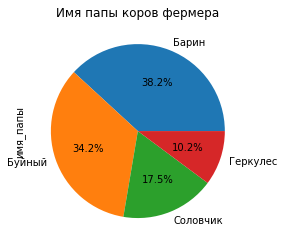

In [48]:
# Построим круговую диаграмму имен пап коров фермера.
dad['имя_папы'].value_counts().plot(kind='pie', title='Имя папы коров фермера', autopct='%1.1f%%')

**Описание данных:** Видим, что всего в выборке четыре имени, распределенных в отношении: Барин - 38.2, Буйный - 34.2, Соловчик - 17.5, Геркулес - 10.2.

### Порода коров ассоциации

In [49]:
buy['порода'].value_counts()

Айдиал     8
Соверин    8
Name: порода, dtype: int64

<AxesSubplot:title={'center':'Порода коров ассоциации'}, ylabel='порода'>

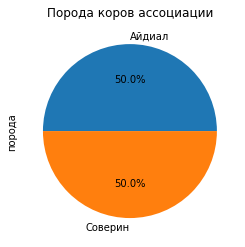

In [50]:
# Построим круговую диаграмму пород коров ассоциации.
buy['порода'].value_counts().plot(kind='pie', title='Порода коров ассоциации', autopct='%1.1f%%')

**Описание данных:** Видим, что всего в выборке две породы, распределенные поровну.

### Тип пастбища коров ассоциации

In [51]:
buy['тип_пастбища'].value_counts()

холмистое    8
равнинное    8
Name: тип_пастбища, dtype: int64

<AxesSubplot:title={'center':'Тип пастбища коров ассоциации'}, ylabel='тип_пастбища'>

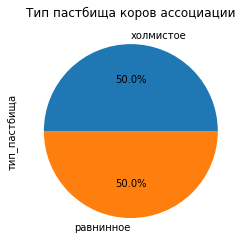

In [52]:
# Построим круговую диаграмму типов пастбищ коров ассоциации.
buy['тип_пастбища'].value_counts().plot(kind='pie', title='Тип пастбища коров ассоциации', autopct='%1.1f%%')

**Описание данных:** Видим, что всего в выборке два типа пастбищ, распределенные поровну.

### Порода пап коров ассоциации

In [53]:
buy['порода_папы'].value_counts()

Соверин    10
Айдиал      6
Name: порода_папы, dtype: int64

<AxesSubplot:title={'center':'Порода коров ассоциации'}, ylabel='порода'>

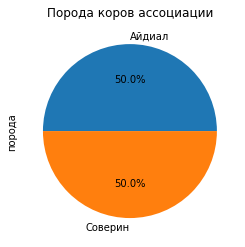

In [54]:
# Построим круговую диаграмму пород коров ассоциации.
buy['порода'].value_counts().plot(kind='pie', title='Порода коров ассоциации', autopct='%1.1f%%')

**Описание данных:** Видим, что всего в выборке две породы, распределенные распределенные поровну.

### Имя пап коров ассоциации

In [55]:
buy['имя_папы'].value_counts()

Буйный      7
Геркулес    5
Барин       2
Соловчик    2
Name: имя_папы, dtype: int64

<AxesSubplot:title={'center':'Имя папы коров ассоциации'}, ylabel='имя_папы'>

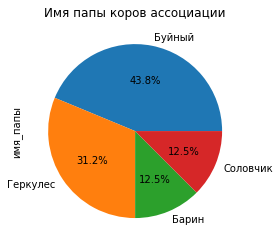

In [56]:
# Построим круговую диаграмму имен пап коров ассоциации.
buy['имя_папы'].value_counts().plot(kind='pie', title='Имя папы коров ассоциации', autopct='%1.1f%%')

**Описание данных:** Видим, что всего в выборке четыре имени, распределенных в отношении: Буйный - 43.8, Геркулес - 31.2, Барин - 12.5, Соловчик - 12.5.

### Текущее содержание жиров в молоке коров ассоциации

In [57]:
buy['текущая_жирность'].describe()

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: текущая_жирность, dtype: float64

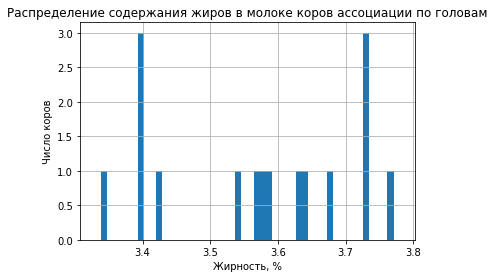

In [58]:
# Построим гистограмму содержания жиров в молоке коров фермера.
buy['текущая_жирность'].hist(bins=50, range=(3.33, 3.78))
plt.title("Распределение содержания жиров в молоке коров ассоциации по головам")
plt.xlabel("Жирность, %")
plt.ylabel("Число коров")
plt.show()

**Описание данных:** Видим распределение в диапазоне от 3.34 до 3.77, без критичных выбросов. Пробелы в показателях объяснимы небольшим количеством наблюдений. Диапазон значений находится внутри такового для содержания жиров в молоке коров фермера - более объемной выборке.

### Текущее содержание белков в молоке коров ассоциации

In [59]:
buy['текущий_белок'].describe()

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: текущий_белок, dtype: float64

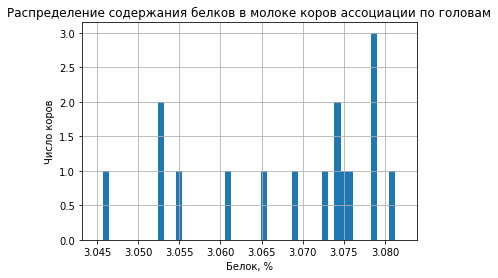

In [60]:
# Построим гистограмму содержания белков в молоке коров фермера.
buy['текущий_белок'].hist(bins=50, range=(3.045, 3.082))
plt.title("Распределение содержания белков в молоке коров ассоциации по головам")
plt.xlabel("Белок, %")
plt.ylabel("Число коров")
plt.show()

**Описание данных:** Видим распределение в диапазоне от 3.046 до 3.081, без критичных выбросов. Диапазон значений находится внутри такового для содержания белков в молоке коров фермера - более объемной выборке.

### Возраст коров ассоциации

In [61]:
buy['возраст'].value_counts()

более_2_лет    11
менее_2_лет     5
Name: возраст, dtype: int64

<AxesSubplot:title={'center':'Возраст коров ассоциации'}, ylabel='возраст'>

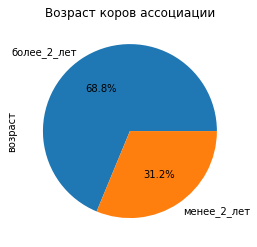

In [62]:
# Построим круговую диаграмму возраста коров ассоциации.
buy['возраст'].value_counts().plot(kind='pie', title='Возраст коров ассоциации', autopct='%1.1f%%')

**Описание данных:** Видим, что выборка распределена в отношении 68.8 к 31.2 с перевесом в пользу коров старше 2 лет.

**Промежуточный вывод:** В целом, за исключением выбросов в удое, данные выглядят нормально распределенными, без необычных выбросов. Пробелы в измерениях жиров и белков молока коров объяснимы погрешностью или шагом измерительных приборов. Данные бинарных признаков (породу, тип пастбищ и возраст) придется закодировать, так же скорее всего понадобится масштабировать данные (например, целевой признак удой измеряется в кг, а содержание сырого протеина в г).

## Корреляционный анализ

### Коэффициенты корреляции между всеми признаками ferma_main.csv

<AxesSubplot:>

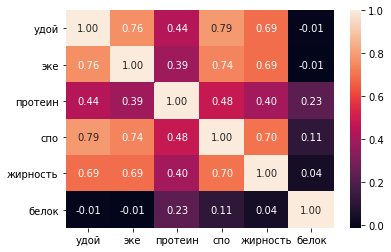

In [63]:
# Воспользуемся тепловой картой для того, чтобы построить таблицу коэффициентов корреляции.
cferma = ferma.drop(columns=['id'])
sns.heatmap(cferma.corr(method='spearman'), annot=True, fmt='.2f')

**Промежуточный вывод:** Видим корреляцию удоя с ЭКЕ, СПО и жирностью и между ЭКЕ, СПО и жирностью.

### Диаграммы рассеяния scatterplot для удоя и всех количественных признаков с учётом значения категориальных признаков

#### Диаграммы с учетом породы

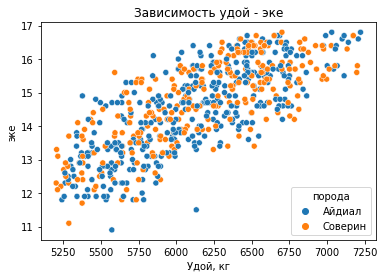

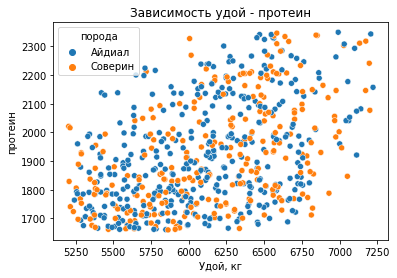

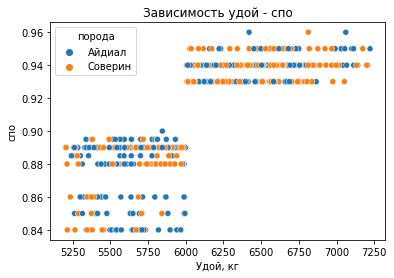

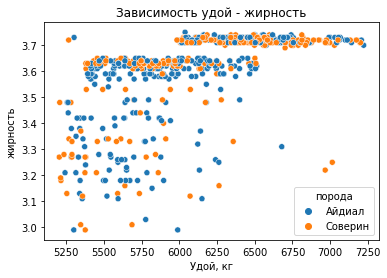

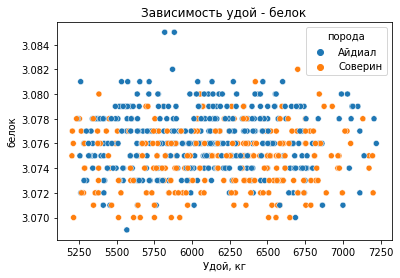

In [64]:
# Используем цикл.
quant = ['эке', 'протеин', 'спо', 'жирность', 'белок']
for i in quant:
    sns.scatterplot(x='удой', y=i, data=ferma, hue='порода')
    plt.title(f'Зависимость удой - {i}')
    plt.xlabel('Удой, кг')
    plt.ylabel(i)
    plt.show()

**Промежуточный вывод:** Видим, что порода коров не имеет особого влияния на зависимости.

#### Диаграммы с учетом типа пастбища

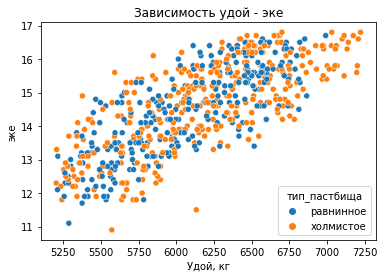

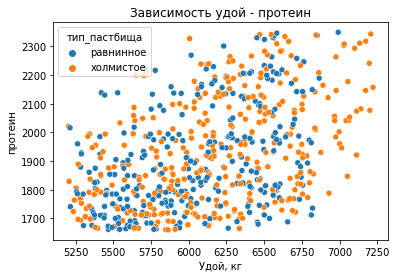

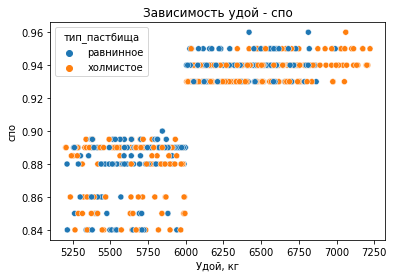

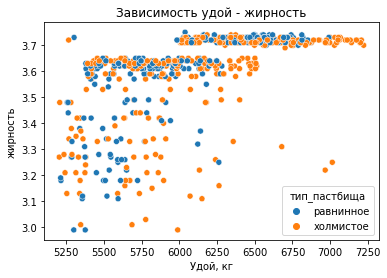

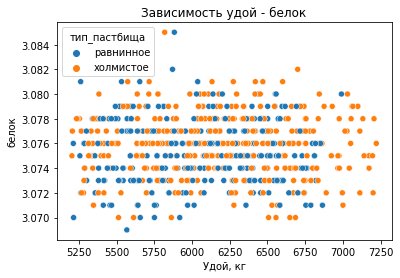

In [65]:
# Используем цикл.
quant = ['эке', 'протеин', 'спо', 'жирность', 'белок']
for i in quant:
    sns.scatterplot(x='удой', y=i, data=ferma, hue='тип_пастбища')
    plt.title(f'Зависимость удой - {i}')
    plt.xlabel('Удой, кг')
    plt.ylabel(i)
    plt.show()

**Промежуточный вывод:** Отметим, что удой более 7000 кг принесен только коровами с холмистых пастбищ.

#### Диаграммы с учетом вкуса молока

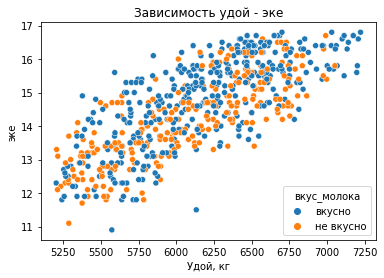

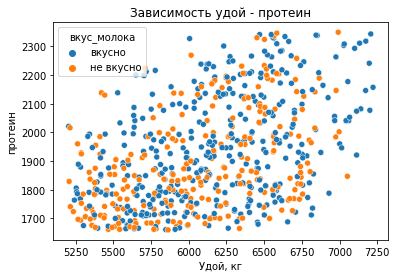

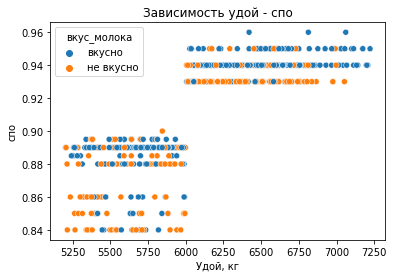

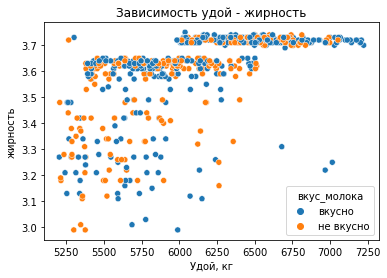

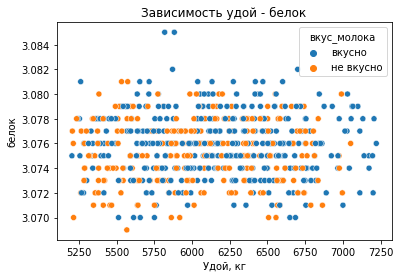

In [66]:
# Используем цикл.
quant = ['эке', 'протеин', 'спо', 'жирность', 'белок']
for i in quant:
    sns.scatterplot(x='удой', y=i, data=ferma, hue='вкус_молока')
    plt.title(f'Зависимость удой - {i}')
    plt.xlabel('Удой, кг')
    plt.ylabel(i)
    plt.show()

**Промежуточный вывод:** Отметим, что у всех коров с удоем более 7050 кг вкусное молоко.

#### Диаграммы с учетом породы папы быка

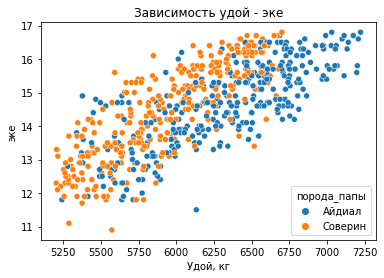

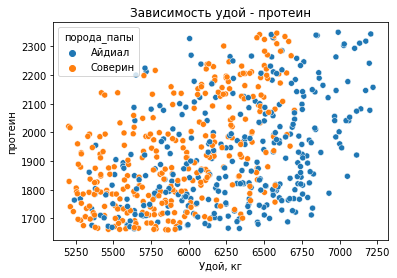

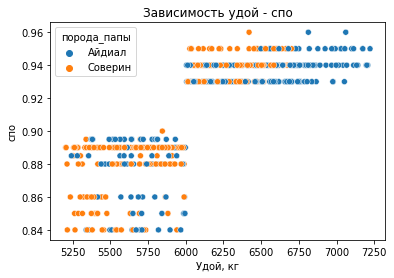

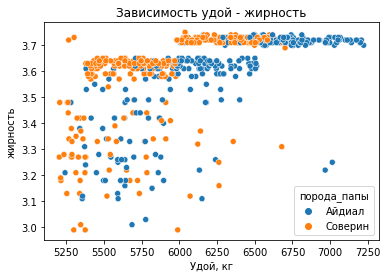

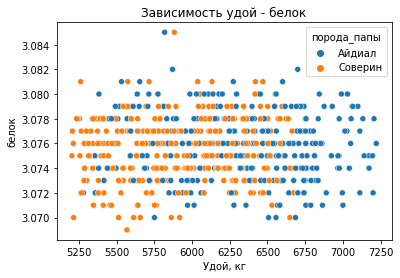

In [67]:
# Используем цикл.
quant = ['эке', 'протеин', 'спо', 'жирность', 'белок']
for i in quant:
    sns.scatterplot(x='удой', y=i, data=ferma, hue='порода_папы')
    plt.title(f'Зависимость удой - {i}')
    plt.xlabel('Удой, кг')
    plt.ylabel(i)
    plt.show()

**Промежуточный вывод:** Отметим, что удой более 6750 кг принесен только коровами от папы породы Вис Бик Айдиал.

#### Диаграммы с учетом возраста коровы

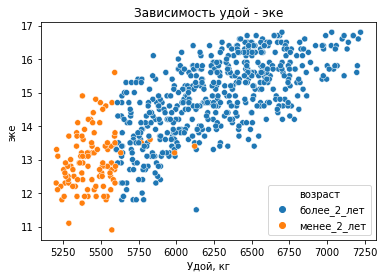

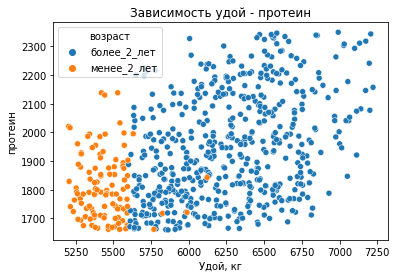

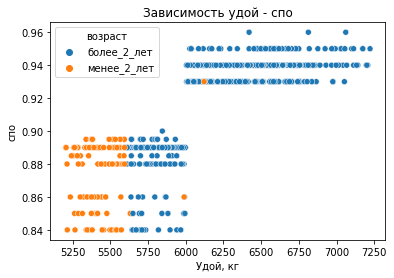

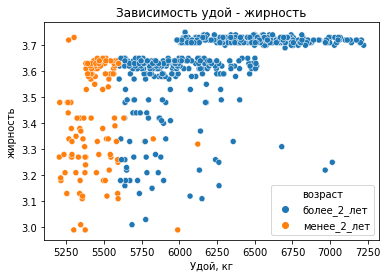

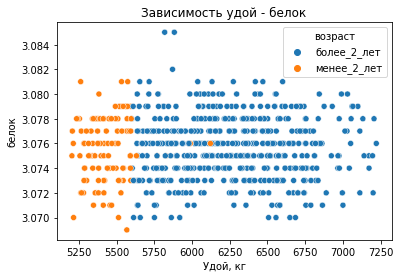

In [68]:
# Используем цикл.
quant = ['эке', 'протеин', 'спо', 'жирность', 'белок']
for i in quant:
    sns.scatterplot(x='удой', y=i, data=ferma, hue='возраст')
    plt.title(f'Зависимость удой - {i}')
    plt.xlabel('Удой, кг')
    plt.ylabel(i)
    plt.show()

**Промежуточный вывод:** Отметим, что, за несколькими исключениями, удой более 6000 кг принесен только коровами возрастом более 2 лет.

### Выводы о взаимосвязи признаков

Между целевым (удой) и входными признаками существуют разные связи:
- Сильная линейная связь с ЭКЕ;
- Слабая линейная связь с протеином;
- Тенденция к кластеризации с СПО и жирностью;
- Отсутствие связи с белками.

Присутствует и взаимосвязь между тремя входными признаками (ЭКЕ, СПО и жирность), однако говорить о мультиколлинеарности рано - коэффициенты корреляции меньше 0.9.

Отметим, что при больших числах удоя, везде, кроме породы, выделяется один категоральный признак.

## Обучение модели линейной регрессии

### Первая модель

В качестве целевого признака используем удой коров, в качестве входных: ЭКЕ, протеин, СПО, порода, тип пастбища, порода папы быка, возраст коровы. Признаки выбраны по корреляции, а так же по распределению на диаграммах рассеяния.

R2 = 0.8189336328735966


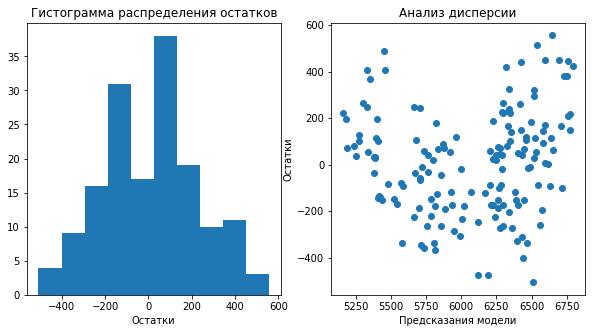

In [69]:
# Создадим константу RANDOM_STATE.
RANDOM_STATE = 42

# Сохраним и разделим выборки.
X = ferma[['эке', 'протеин', 'спо', 'порода', 'тип_пастбища', 'порода_папы', 'возраст']]
y = ferma['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# Уточним, какие признаки категоральные, а какие - количественные.
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст']
num_col_names = ['эке', 'протеин', 'спо']

# Масштабируем количественные признаки с помощью стандартизации.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Закодируем категоральные признаки.
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Cоздадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных.
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединим все преобразованные данные в тренировочный и тестовый датафреймы.
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Инициализируем и обучим модель линейной регрессии.
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Получим предсказания модели на тестовых данных.
predictions = model_lr.predict(X_test)

# Рассчитаем значение R2 для линейной регрессии.
r2 = r2_score(y_test, predictions)
print("R2 =", r2)

# Проведем анализ остатков.
residuals = y_test - predictions
# Построим графики - гистограмму частотности распределения и диаграмму рассеяния.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [70]:
# Рассчитаем MSE модели.
mean_squared_error(y_test, predictions)

49615.04881247562

In [71]:
# Рассчитаем RMSE модели.
mean_squared_error(y_test, predictions, squared = False)

222.7443575322967

In [72]:
# Рассчитаем MAE модели.
mean_absolute_error(y_test, predictions)

181.0387647118692

**Промежуточный вывод:** Значение коэффициента детерминации близко к единице (R2 = 0.82). Гистограмма распределения остатков похожа на нормальное распределение, но смещена вправо - модель недооценивает реальные значения целевого признака, её прогнозы меньше фактических показателей. Разброс остатков для средних прогнозов модели меньше, чем для малых и больших. В целом, есть над чем поработать для улучшения модели.

### Вторая модель

Из диаграммы рассеяния видим, что показания СПО относительно удоя сгруппированы в два кластера: больше 0.92 и меньше. Следовательно, чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

In [73]:
ferma['спо_б'] = ferma['спо']
ferma.loc[ferma['спо'] >= 0.92, 'спо_б'] = 1
ferma.loc[ferma['спо'] < 0.92, 'спо_б'] = 0
ferma.head()

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,спо_б
0,1,5863.0,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0.0
1,2,5529.0,12.8,2138,0.890,Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0.0
2,3,5810.0,14.0,1854,0.885,Соверин,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0.0
3,4,5895.0,12.4,2012,0.885,Соверин,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0.0
4,5,5302.0,12.8,1675,0.885,Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0.0


Чтобы улучшить линейность между удоем и ЭКЕ, введем новый признак ЭКЕ в квадрате.

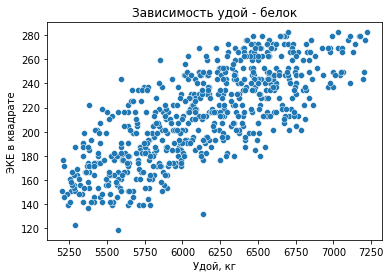

In [74]:
ferma['эке2'] = ferma['эке'] ** 2

# Проверим изменения на диаграмме рассеяния.
sns.scatterplot(x='удой', y='эке2', data=ferma)
plt.title(f'Зависимость удой - {i}')
plt.xlabel('Удой, кг')
plt.ylabel('ЭКЕ в квадрате')
plt.show()

In [75]:
# Коэффициент корреляции для ЭКЕ в квадрате.
ferma['удой'].corr(ferma['эке2'])

0.7626318671077476

In [76]:
# Выведем еще раз коэффициент корреляции для ЭКЕ первой степени.
ferma['удой'].corr(ferma['эке'])

0.7617233943871714

Возведение ЭКЕ в квадрат незначительно улучшило корреляцию.

R2 = 0.8436790410146532


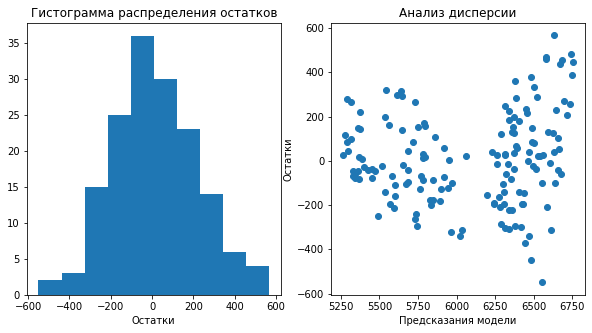

In [77]:
# Обучим вторую модель, используя ЭКЕ в квадрате и учитывая СПО как категориальный бинарный признак.

# Сохраним и разделим выборки.
X = ferma[['эке2', 'протеин', 'спо_б', 'порода', 'тип_пастбища', 'порода_папы', 'возраст']]
y = ferma['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# Уточним, какие признаки категоральные, а какие - количественные.
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст']
num_col_names = ['эке2', 'протеин', 'спо_б']

# Масштабируем количественные признаки с помощью стандартизации.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Закодируем категоральные признаки.
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Cоздадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных.
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединим все преобразованные данные в тренировочный и тестовый датафреймы.
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Инициализируем и обучим модель линейной регрессии.
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# Получим предсказания модели на тестовых данных.
predictions = model_lr.predict(X_test)

# Рассчитаем значение R2 для линейной регрессии.
r2 = r2_score(y_test, predictions)
print("R2 =", r2)

# Проведем анализ остатков.
residuals = y_test - predictions
# Построим графики - гистограмму частотности распределения и диаграмму рассеяния.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [78]:
# Рассчитаем MSE модели.
mean_squared_error(y_test, predictions)

42834.4155436474

In [79]:
# Рассчитаем RMSE модели.
mean_squared_error(y_test, predictions, squared = False)

206.96476884640873

In [80]:
# Рассчитаем MAE модели.
mean_absolute_error(y_test, predictions)

163.89322138351523

**Промежуточный вывод:** Видим, что коэффициент детерминации увеличился (R2 = 0.84). Гистограмма распределения остатков выровнялась ближе к центру, значит качество прогнозов улучшилось. Однако теперь она немного смещена влево, значит модель переоценивает реальные значения целевого признака, её прогнозы больше фактических показателей. Разброс остатков же сузился, что является минусом.

### Третья модель

Добавим категоральный признак 'Имя Папы' из файла 'ferma_dad.csv', соединив его с остальными данными ferma_main.csv.

In [81]:
ferma = pd.merge(ferma, dad, on = 'id')

R2 = 0.8625940367657647


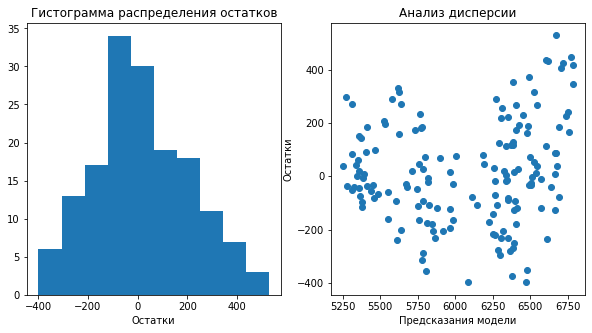

In [82]:
# Обучим третью модель, учитывая имя папы быка как категориальный признак.

# Сохраним и разделим выборки.
X = ferma[['эке2', 'протеин', 'спо_б', 'порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы']]
y = ferma['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# Уточним, какие признаки категоральные, а какие - количественные.
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы']
num_col_names = ['эке2', 'протеин', 'спо_б']

# Масштабируем количественные признаки с помощью стандартизации.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Закодируем категоральные признаки.
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Cоздадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных.
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединим все преобразованные данные в тренировочный и тестовый датафреймы.
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Инициализируем и обучим модель линейной регрессии.
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# Получим предсказания модели на тестовых данных.
predictions = model_lr.predict(X_test)

# Рассчитаем значение R2 для линейной регрессии.
r2 = r2_score(y_test, predictions)
print("R2 =", r2)

# Проведем анализ остатков.
residuals = y_test - predictions
# Построим графики - гистограмму частотности распределения и диаграмму рассеяния.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [83]:
# Рассчитаем MSE модели.
mean_squared_error(y_test, predictions)

37651.40749873523

In [84]:
# Рассчитаем RMSE модели.
mean_squared_error(y_test, predictions, squared = False)

194.03970598497418

In [85]:
# Рассчитаем MAE модели.
mean_absolute_error(y_test, predictions)

153.40346297258097

**Промежуточный вывод:** Видим, что коэффициент детерминации снова увеличился (R2 = 0.86). Гистограмма распределения осталась примерно такой же. Разброс остатков же теперь более равномерно распределен.

Исходя из метрик R2, MSE, RMSE и MAE, будем считать третью модель самой лучшей, т.к. ее R2 больше, а ошибки меньше других двух моделей.

In [87]:
# Рассчитаем доверительный интервал прогноза выбранной нами модели.
errors = y_test - predictions
quantiles=(0.025, 0.975)

lower_quantile = np.quantile(errors, quantiles[0])
upper_quantile = np.quantile(errors, quantiles[1])

print(f"Доверительный интервал прогноза: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал прогноза: [-351.4654480409838, 423.34424968158675]


### Прогноз удоя коров ассоциации

In [1321]:
# Добавим отсутствующие параметры в 'cow_buy.csv' согласно описанию данных.
buy['эке'] = ferma['эке'].mean()*1.05
buy['эке2'] = buy['эке'] ** 2
buy['протеин'] = ferma['протеин'].mean()*1.05
buy['спо'] = ferma['спо'].mean()*1.05
buy['спо_б'] = buy['спо']
buy.loc[buy['спо'] >= 0.92, 'спо_б'] = 1
buy.loc[buy['спо'] < 0.92, 'спо_б'] = 0
buy.rename(columns={'текущая_жирность':'жирность'}, inplace=True)
buy.rename(columns={'текущий_белок':'белок'}, inplace=True)
buy.head()

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,эке2,протеин,спо,спо_б
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0


In [1322]:
# Передадим выборки.
X = buy.drop(['эке', 'жирность', 'белок', 'спо'], axis = 1)
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы']
num_col_names = ['эке2', 'протеин', 'спо_б']

# Закодируем категоральные признаки.
X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки с помощью стандартизации.
X_scaled = scaler.transform(X[num_col_names])
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

# Объединим все преобразованные данные в датафреймы.
X = pd.concat([X_ohe, X_scaled], axis=1)

# Предскажем целевой признак.
predictions = model_lr.predict(X)
buy['прогноз_удой'] = predictions
buy.head(16)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,эке2,протеин,спо,спо_б,прогноз_удой
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6550.198957
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6294.298520
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6288.134138
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6594.988079
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6542.344086
5,Соверин,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6340.757685
6,Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6502.473225
7,Соверин,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6386.813374
8,Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6348.745868
9,Соверин,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6548.932390


**Промежуточный вывод:** С помощью третьей модели линейной регрессии получили предсказания удоя коров ассоциации.

## Обучение модели логистической регрессии

### Первая модель

In [1323]:
# Преобразуем вкус молока в категориальный бинарный признак.
ferma.loc[ferma['вкус_молока'] == 'вкусно', 'вкус_молока'] = 1
ferma.loc[ferma['вкус_молока'] == 'не вкусно', 'вкус_молока'] = 0
ferma['вкус_молока'] = ferma['вкус_молока'].astype('int')
ferma.head()

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,спо_б,эке2,имя_папы
0,1,5863.0,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,1,более_2_лет,0.0,201.64,Буйный
1,2,5529.0,12.8,2138,0.890,Айдиал,равнинное,Соверин,3.54,3.079,1,менее_2_лет,0.0,163.84,Соловчик
2,3,5810.0,14.0,1854,0.885,Соверин,холмистое,Соверин,3.59,3.074,0,более_2_лет,0.0,196.00,Барин
3,4,5895.0,12.4,2012,0.885,Соверин,холмистое,Айдиал,3.40,3.075,0,более_2_лет,0.0,153.76,Буйный
4,5,5302.0,12.8,1675,0.885,Айдиал,равнинное,Соверин,3.73,3.073,1,менее_2_лет,0.0,163.84,Барин


В качестве целевого признака используем вкус молока, в качестве входных - все остальные, за исключением предсказанного удоя, категорального СПО и ЭКЕ в квадрате.

In [1324]:
# Сохраним и разделим выборки.
X = ferma.drop(['вкус_молока', 'id', 'удой', 'спо_б', 'эке2'], axis = 1)
y = ferma['вкус_молока']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# Уточним, какие признаки категоральные, а какие - количественные.
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы']
num_col_names = ['эке', 'протеин', 'спо', 'жирность', 'белок']

# Масштабируем количественные признаки с помощью стандартизации.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Закодируем категоральные признаки.
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Cоздадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных.
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединим все преобразованные данные в тренировочный и тестовый датафреймы.
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Инициализируем и обучим модель логистической регрессии.
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

# Получим предсказания модели на тестовых данных.
y_pred = clf.predict(X_test)

In [1325]:
# Рассчитаем accuracy модели.
accuracy_score(y_test, y_pred)

0.6075949367088608

In [1326]:
# Рассчитаем recall модели.
recall_score(y_test, y_pred)

0.7216494845360825

In [1327]:
# Рассчитаем precision модели.
precision_score(y_test, y_pred)

0.6666666666666666

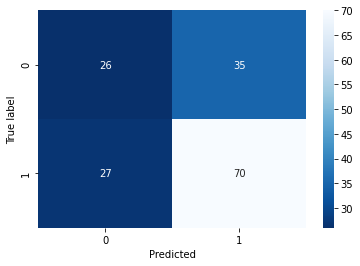

In [1328]:
# Построим матрицу ошибок.
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

**Промежуточный вывод:** Метрика precision показывает точность, с которой модель присваивает объектам класс 1, учитывая ложные 1, а метрика recall - ложные 0. Для заказчика главное - вкус молока, значит нам необходимо, чтобы precision была как можно ближе к 1, чтобы коровы ассоциации, дающие невкусное молоко, не были куплены заказчиком (то есть критичнее ошибка первого рода). Добиться этого можно, изменив порог принадлежности к классам.

### Порог классификации

In [1329]:
# Изменим порог принадлежности к классам с помощью цикла.
threshold = clf.predict_proba(X_test)[:,1]

for i in np.arange(0.7, 0.9, 0.01).round(2):
    y_pred = threshold > i
    print('Порог классификации:', i, 'precision:', round(precision_score(y_test, y_pred, zero_division=0), 2), 
          'recall:', round(recall_score(y_test, y_pred), 2))

Порог классификации: 0.7 precision: 0.76 recall: 0.29
Порог классификации: 0.71 precision: 0.73 recall: 0.25
Порог классификации: 0.72 precision: 0.77 recall: 0.24
Порог классификации: 0.73 precision: 0.79 recall: 0.23
Порог классификации: 0.74 precision: 0.83 recall: 0.21
Порог классификации: 0.75 precision: 0.8 recall: 0.16
Порог классификации: 0.76 precision: 0.8 recall: 0.16
Порог классификации: 0.77 precision: 0.79 recall: 0.15
Порог классификации: 0.78 precision: 0.8 recall: 0.12
Порог классификации: 0.79 precision: 0.73 recall: 0.08
Порог классификации: 0.8 precision: 0.78 recall: 0.07
Порог классификации: 0.81 precision: 1.0 recall: 0.05
Порог классификации: 0.82 precision: 1.0 recall: 0.05
Порог классификации: 0.83 precision: 1.0 recall: 0.03
Порог классификации: 0.84 precision: 1.0 recall: 0.02
Порог классификации: 0.85 precision: 1.0 recall: 0.02
Порог классификации: 0.86 precision: 1.0 recall: 0.02
Порог классификации: 0.87 precision: 1.0 recall: 0.01
Порог классификации: 0

In [1330]:
# Обозначим новый порог.
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.81).astype('int')

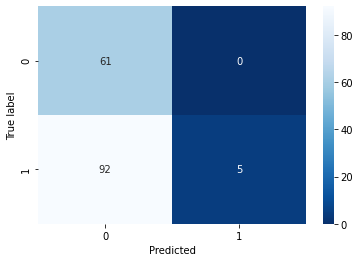

In [1331]:
# Построим новую матрицу ошибок.
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [1332]:
# Рассчитаем новое значение recall модели.
recall_score(y_test, y_pred)

0.05154639175257732

In [1333]:
# Рассчитаем новое значение precision модели.
precision_score(y_test, y_pred)

1.0

**Промежуточный вывод:** Выбрали порог, при котором recall как можно выше, а значение precision равно 1. Таким порогом является 0.81. Количество ошибок первого рода сократилось до нуля, однако recall уменьшилась в 14 раз.

### Прогноз вкуса молока коров ассоциации

In [1334]:
# Передадим выборки.
X = buy.drop(['прогноз_удой', 'эке2', 'спо_б'], axis = 1)
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы']
num_col_names = ['эке', 'протеин', 'спо', 'жирность', 'белок']

# Закодируем категоральные признаки.
X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки с помощью стандартизации.
X_scaled = scaler.transform(X[num_col_names])
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

# Объединим все преобразованные данные в датафреймы.
X = pd.concat([X_ohe, X_scaled], axis=1)

# Предскажем целевой признак.
predictions = (clf.predict_proba(X)[:,1] >= 0.81).astype('int')
buy['прогноз_вкус_молока'] = predictions
buy.loc[buy['прогноз_вкус_молока'] == 1, 'прогноз_вкус_молока'] = 'вкусно'
buy.loc[buy['прогноз_вкус_молока'] == 0, 'прогноз_вкус_молока'] = 'не вкусно'
buy.head(16)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,эке2,протеин,спо,спо_б,прогноз_удой,прогноз_вкус_молока
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6550.198957,не вкусно
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6294.298520,не вкусно
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6288.134138,не вкусно
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6594.988079,не вкусно
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6542.344086,не вкусно
5,Соверин,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6340.757685,не вкусно
6,Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6502.473225,не вкусно
7,Соверин,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6386.813374,не вкусно
8,Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6348.745868,не вкусно
9,Соверин,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6548.932390,не вкусно


**Промежуточный вывод:** С помощью модели логистической регрессии, изменив порог классификации, получили предсказания вкуса молока коров ассоциации.

## Итоговые выводы

### Отбор коров ассоциации

In [1335]:
buy.loc[(buy['прогноз_удой'] > 6000) & (buy['прогноз_вкус_молока'] == "вкусно")]

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,эке2,протеин,спо,спо_б,прогноз_удой,прогноз_вкус_молока
11,Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.271073,233.205675,2019.532273,0.958772,1.0,6086.979282,вкусно


**Промежуточный вывод:** Требованиям фермера отвечает только одна из предложенных ассоциацией коров.

### Общий вывод

**Цель исследования:** Разработали модели машинного обучения, которые помогут заказчику управлять рисками и принимать объективное решение о покупке коров, спрогнозировав удой и вкус молока.

**Загрузка и предобработка данных:** Привели названия столбцов датафреймов к общему читаемому виду, удалили явные и неявные дубликаты, проверили датафреймы на пропуски, и привели данные к нужным типам для работы.

**Исследовательский анализ данных:** Провели статистический анализ всех признаков датафреймов, построили графики для каждого признака. Обнаружили выбросы в данных удоя коров фермера, заменили их по медиане. За этим исключением, данные выглядят нормально распределенными, без необычных выбросов. Пробелы в показателях жиров и белков молока коров возможно объяснимы точностью измерительных приборов, разными породами или кормом.

**Корреляционный анализ данных:** Провели корреляционный анализ данных. На тепловой карте корреляции Спирмена видим корреляцию удоя с ЭКЕ, СПО и жирностью и между ЭКЕ, СПО и жирностью. Между удоем и входными признаками существуют разные связи:
- Сильная линейная связь с ЭКЕ;
- Слабая линейная связь с протеином;
- Тенденция к кластеризации с СПО и жирностью;
- Отсутствие связи с белками.

Присутствует и взаимосвязь между тремя входными признаками (ЭКЕ, СПО и жирность), однако говорить о мультиколлинеарности рано - днако говорить о мультиколлинеарности рано - коэффициенты корреляции меньше 0.9.

**Обучение модели линейной регрессии:** В качестве целевого признака использовали удой коров, в качестве входных: ЭКЕ, СПО, жирность молока, тип пастбища, порода папы быка, возраст коровы. Признаки выбраны по корреляции, а так же по распределению на диаграммах рассеяния. Данные пришлось кодировать и масштабировать. Всего обучили 3 модели:
- Первую, как описано выше;
- Вторую, возведя ЭКЕ в квадрат и преобразовав СПО в категориальный бинарный признак, чтобы устранить нелинейность, так как из диаграммы рассеяния увидели, что показания СПО относительно удоя сгруппированы в два кластера: больше 0.92 и меньше;
- Третью, добавив помимо этого категоральный признак 'Имя Папы' из файла 'ferma_dad.csv', соединив его с остальными данными ferma_main.csv.

Исходя из метрик R2, MSE, RMSE и MAE, выбрали третью модель, т.к. ее R2 больше, а ошибки меньше других двух моделей. С её помощью получили предсказания удоя коров ассоциации.

**Обучение модели логистической регрессии:** В качестве целевого признака используем вкус молока, в качестве входных - все остальные, за исключением предсказанного удоя, категорального СПО и ЭКЕ в квадрате. Так как для заказчика главное - вкус молока, нам нужно было сделать так, чтобы precision была как можно ближе к 1, чтобы коровы ассоциации, дающие невкусное молоко, не были куплены заказчиком (то есть критичнее была ошибка первого рода). Чтобы этого достичь, выбрали порог классификации модели, при котором значение метрики precision равно 1. Количество ошибок первого рода сократилось до нуля, однако пострадала recall, сделав предсказания модели довольно строгими. В итоге получили предсказания вкуса молока коров ассоциации.

**Результаты прогнозов:** После предсказания удоя и вкуса, отобрали одну корову ассоциации с прогнозируемым удоем больше 6000 кг в год и предположительно вкусным молоком, которую фермер может купить с минимальным риском для себя. У всех предложенных коров хороший прогнозируемый удой, однако вкус молока важнее.

**Рекомендации:** Фермеру следует обращать внимание на параметры корма ассоциации, так как переход на новый корм дает результаты не мгновенно. Также рекомендуется попробовать молоко всех предложенных ассоциацией коров и дать личную оценку вкуса. Технологам заказчика стоит обратить внимание на отношение сахара к протеину в корме коров: у всех коров фермера с удоем более 6000 кг в год СПО в корме выше 0.92. Также отметим, что согласно корреляционному анализу, рекордный вкусный удой могут приносить лишь некоторые коровы старше 2 лет с холмистых пастбищ от папы породы Вис Бик Айдиал.